#### TASK 2 RESULTS :

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

This is the results of the task 3 : 

In [101]:
# transform the file in csv
read_file = pd.read_csv(r'losses_and_results/results_task_2.txt')
read_file.to_csv (r'losses_and_results/results_task_2.csv', index=None)

# read the csv file
df_task_2 = pd.read_csv("losses_and_results/results_task_2.csv")

df_task_2 = df_task_2.rename(columns={"Non_rhymes\t": "Non_rhymes"})
df_task_2 = df_task_2.rename(columns={"Accuracy": "Percentage of rhyme"})
df_task_2 = df_task_2.rename(columns={"Name": "Time"})

In [102]:
df_task_2['ratio_keeped'] = df_task_2['rhymes']*200/(df_task_2['rhymes']*2+df_task_2['discarded'])

In [103]:
df_task_2['ratio_keeped'] = 100-df_task_2['ratio_keeped']

In [104]:
df_task_2

,Time,Size,rhymes,discarded,Epochs,Percentage of rhyme,Perfect,Assonant,Non_rhymes,ratio_keeped
0,baseline,328,4123,0,0,7.6140,4.3035,6.6208,89.0756,0.000000
1,epoch10,56,449,292,10,14.3653,12.2494,4.2316,83.5189,24.537815
2,epoch20,56,486,314,20,18.8272,15.0206,7.6132,77.3663,24.416796
3,epoch30,56,464,304,30,16.3793,13.3621,6.0345,80.6034,24.675325
4,epoch40,55,457,286,40,15.2079,13.3479,3.7199,82.9322,23.833333
5,epoch50,55,457,300,50,19.4748,15.5361,7.8775,76.5864,24.711697


In [105]:
# ratio keeped
df2 = df_task_2.drop(index=0, axis=0)

df2['ratio_keeped'].describe()

count     5.000000
mean     24.434993
std       0.356098
min      23.833333
25%      24.416796
50%      24.537815
75%      24.675325
max      24.711697
Name: ratio_keeped, dtype: float64

<AxesSubplot: xlabel='Time', ylabel='Percentage of rhyme'>

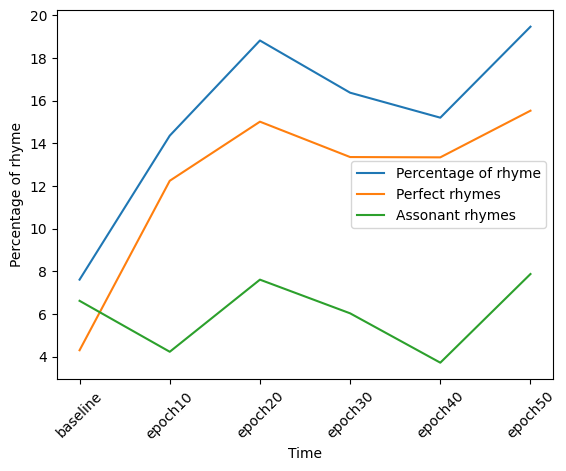

In [106]:
plt.xticks(rotation=45)
sns.lineplot(df_task_2, x="Time", y="Percentage of rhyme", label='Percentage of rhyme')
sns.lineplot(df_task_2, x="Time", y="Perfect", label='Perfect rhymes')
sns.lineplot(df_task_2, x="Time", y="Assonant", label='Assonant rhymes')
# sns.lineplot(df_task_2, x="Time", y="ratio_keeped", label='Removed lines')

<AxesSubplot: xlabel='Time', ylabel='Non_rhymes'>

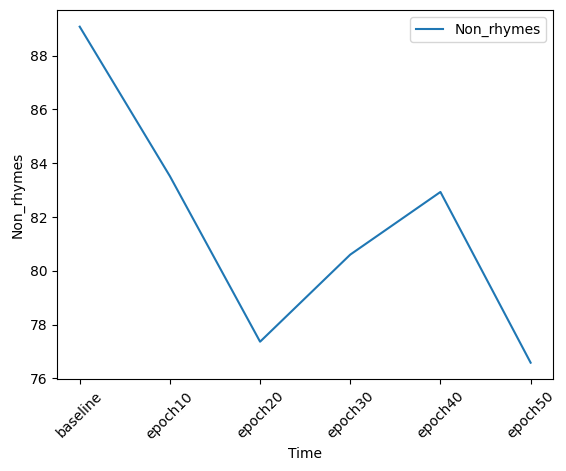

In [107]:
plt.xticks(rotation=45)
sns.lineplot(df_task_2, x="Time", y="Non_rhymes", label='Non_rhymes')

<AxesSubplot: xlabel='Time', ylabel='ratio_keeped'>

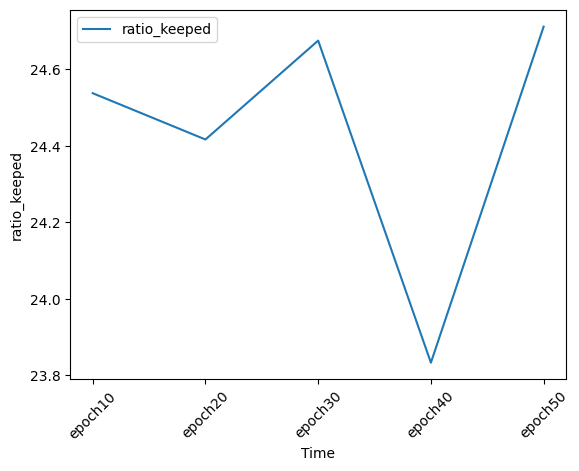

In [108]:
plt.xticks(rotation=45)
sns.lineplot(df2, x="Time", y="ratio_keeped", label='ratio_keeped')

# enlever la baseline

In [109]:
def process_data_frame(df):
    new_df = pd.DataFrame()
    new_df['epoch'] = df.apply(lambda x: x['epoch'])
    new_df['learning_rate'] = df.apply(lambda x: x.get('learning_rate'))
    new_df['loss'] = df.apply(lambda x: x.get('loss'))
    new_df['step'] = df.apply(lambda x: x.get('step'))
    return new_df

In [110]:
def plot_df(df):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    ax1.plot(df['epoch'], df["learning_rate"], label='learning_rate', color='m')
    ax1.set_xlabel("epoch")
    ax1.set_ylabel("learning_rate")
    ax1.legend()


    ax2.plot(df['epoch'], df["loss"], label='loss')
    ax2.set_xlabel("epoch")
    ax2.set_ylabel("loss")
    ax2.legend()

This is the result every 10 epochs (from 10 to 50 epochs).
For each step of 10 epochs, we have a json file that contains the log of the training.
By running all theses cells you'll retreive the informations of each 10 epochs and plot the learning rate and the training loss.

The goal here is to scrap the json files from the checkpoint, at each 10 epochs step for the training of our model.
With this, we'll gather information about :

-Epochs

-Learning rate

-loss

-step number

In [111]:
df_E_10 = pd.read_json('checkpoints_task_2/checkpoint-2500_E_10/trainer_state.json')['log_history']

In [112]:
df_log_E_10 = process_data_frame(df_E_10).dropna()

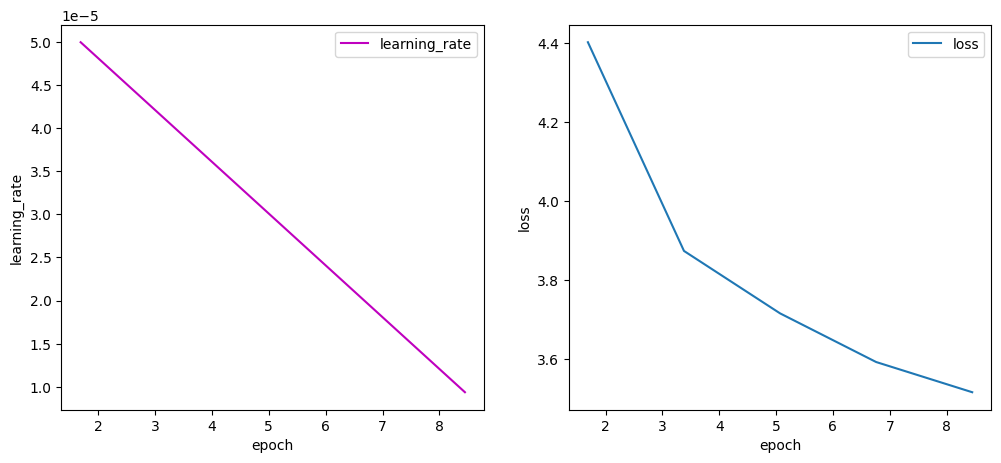

In [113]:
plot_df(df_log_E_10)

In [114]:
df_E_20 = pd.read_json('checkpoints_task_2/checkpoint-2500_E_20/trainer_state.json')['log_history']

In [115]:
df_log_E_20 = process_data_frame(df_E_20).dropna()

,epoch,learning_rate,loss,step
0,1.69,0.000050,3.4246,500
2,3.38,0.000040,3.3024,1000
4,5.07,0.000030,3.1952,1500
6,6.76,0.000020,3.0964,2000
8,8.45,0.000009,3.0484,2500


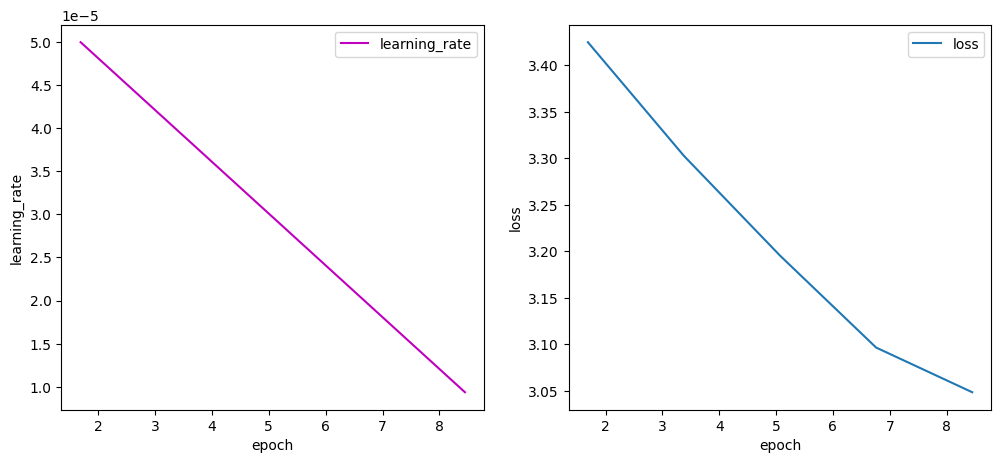

In [116]:
plot_df(df_log_E_20)

df_log_E_20.head()

In [117]:
df_E_30 = pd.read_json('checkpoints_task_2/checkpoint-2500_E_30/trainer_state.json')['log_history']

In [118]:
df_log_E_30 = process_data_frame(df_E_30).dropna()

,epoch,learning_rate,loss,step
0,1.69,0.000050,2.9324,500
2,3.38,0.000040,2.7606,1000
4,5.07,0.000030,2.6899,1500
6,6.76,0.000020,2.6268,2000
8,8.45,0.000009,2.6193,2500


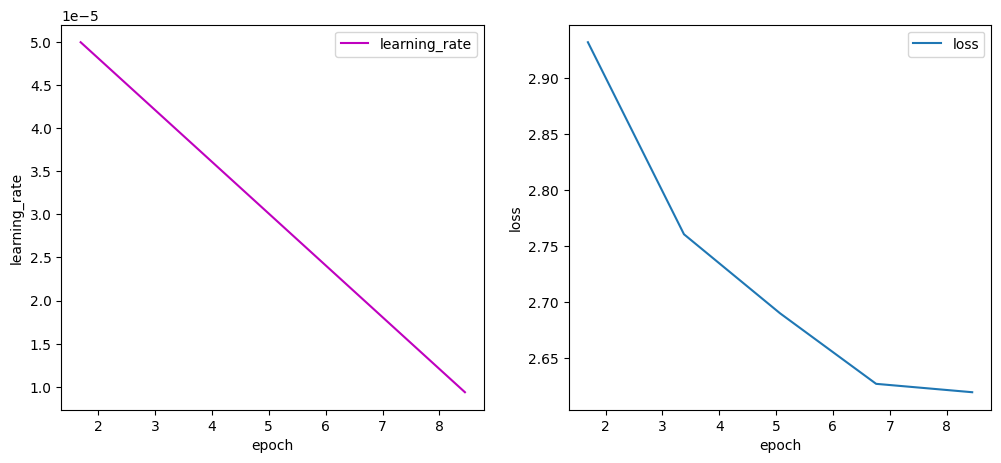

In [119]:
plot_df(df_log_E_30)

df_log_E_30.head()

In [120]:
df_E_40 = pd.read_json('checkpoints_task_2/checkpoint-2500_E_40/trainer_state.json')['log_history']

In [121]:
df_log_E_40 = process_data_frame(df_E_40).dropna()

,epoch,learning_rate,loss,step
0,1.69,0.000050,2.4644,500
2,3.38,0.000040,2.2223,1000
4,5.07,0.000030,2.1995,1500
6,6.76,0.000020,2.1832,2000
8,8.45,0.000009,2.2249,2500


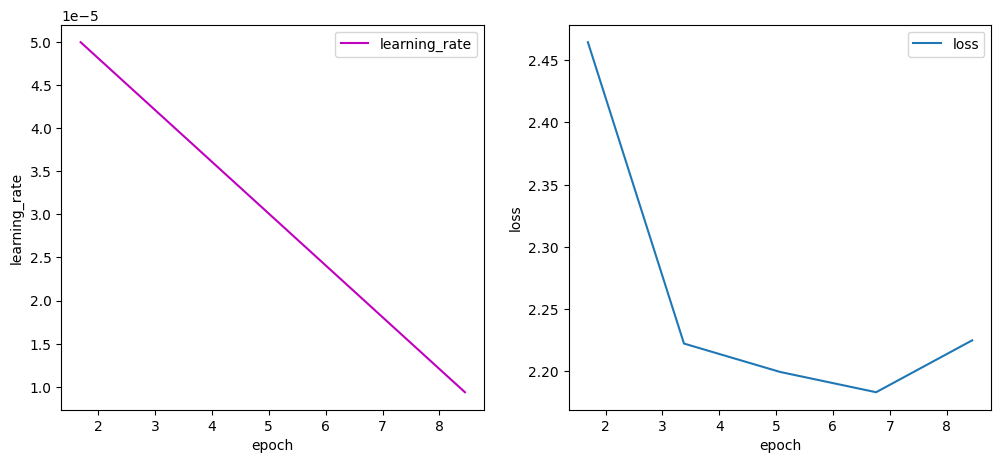

In [122]:
plot_df(df_log_E_40)

df_log_E_40.head()

In [123]:
df_E_50 = pd.read_json('checkpoints_task_2/checkpoint-2500_E_50/trainer_state.json')['log_history']

In [124]:
df_log_E_50 = process_data_frame(df_E_50).dropna()

5

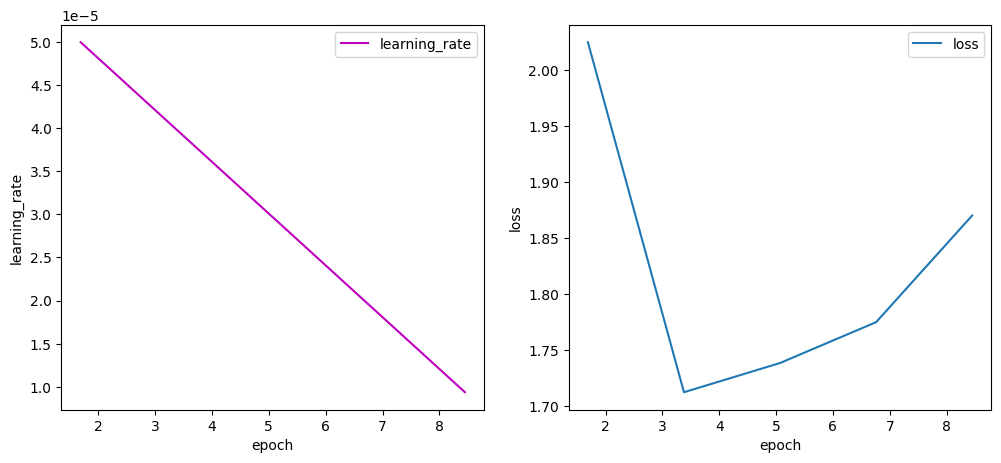

In [125]:
plot_df(df_log_E_50)

len(df_log_E_50)

Let's concat all df_logs to plot training loss from epoch 2à to epoch 100

In [126]:
frames = [df_log_E_10, df_log_E_20, df_log_E_30, df_log_E_40, df_log_E_50]

In [127]:
result = pd.concat(frames)

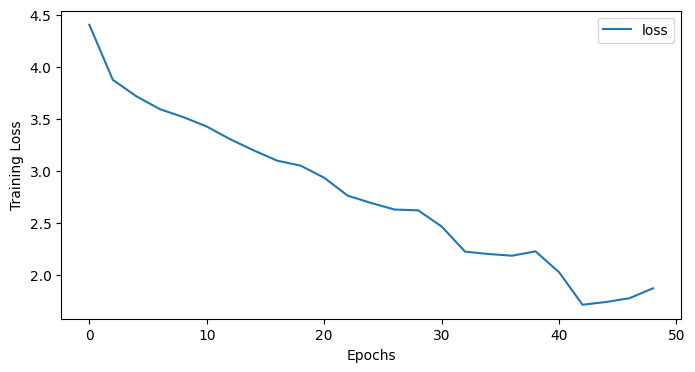

In [128]:
x = range(0, 2*len(df_losses), 2)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.plot(x, result['loss'], label='loss')
ax.set_xlabel("Epochs")
ax.set_ylabel("Training Loss")
ax.legend()

We now plot the TRAINING_LOSS and VALIDATION_LOSS from epoch 0 to 100

In [129]:
# transform the file in csv
read_file = pd.read_csv(r'losses_and_results/losses_exp2.txt')
read_file.to_csv (r'losses_and_results/losses_exp2.csv', index=None)
# read the csv file
df_losses = pd.read_csv("losses_and_results/losses_exp2.csv")

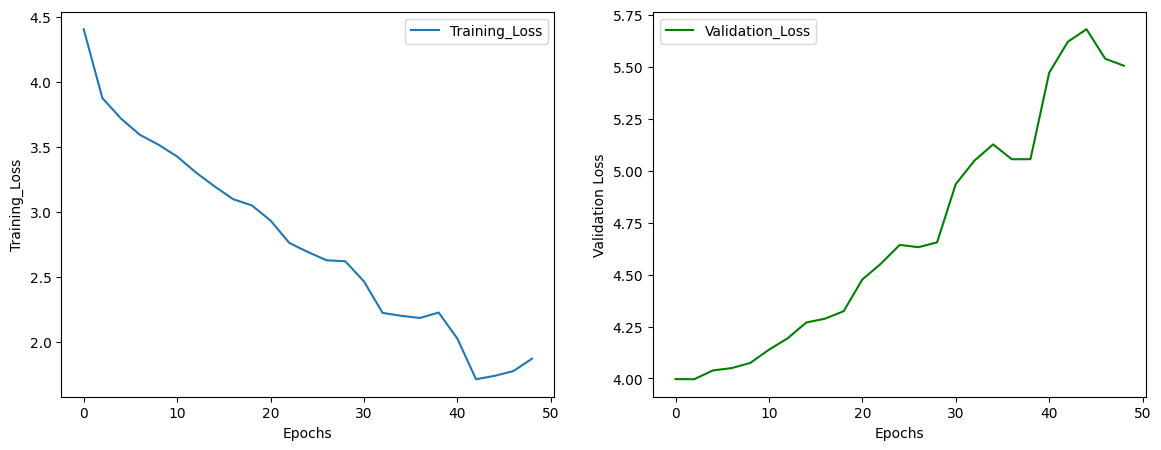

In [130]:
y = range(0, 2*len(df_losses), 2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(y, df_losses['Training_Loss'], label='Training_Loss')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Training_Loss")
ax1.legend()

ax2.plot(y, df_losses['Validation_Loss'], label='Validation_Loss', color='g')
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Validation Loss")
ax2.legend()